#### Import Require Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('operations.csv')
data.head()

,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
0,2023-03-31,DONATION XX XX XX XX XX XX XX,-1.44,1515.25,OTHER,DONATION,small,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,PAYMENT XX XX MTA XX,-24.00,1513.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,PAYMENT XX XX MTA XX,-73.00,1489.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
3,2023-04-03,PAYMENT XX XX XX XX,-14.39,1416.81,OTHER,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
4,2023-04-03,TRANSFER XX XX XX XX XX XX,4.80,1402.42,OTHER,TRANSFER,(not an expense),credit,2023,4,3,Monday,1,False,1


--------------------
OTHER
mean:
 23.43320754716981
med:
 -8.31
mod:
 0   -1.6
Name: amount, dtype: float64
var:
 40401.82999254187
ect:
 201.00206464746046
skw:
 3.1215325222336427
kur:
 12.716537970826296


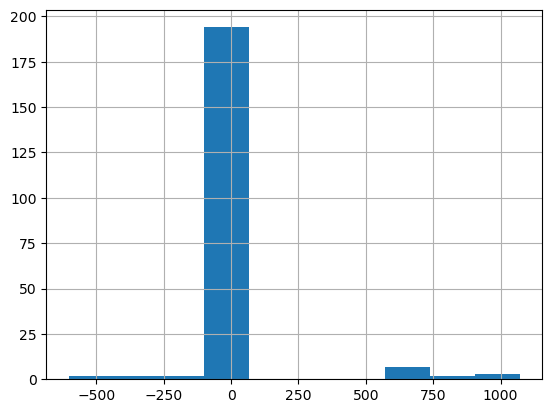

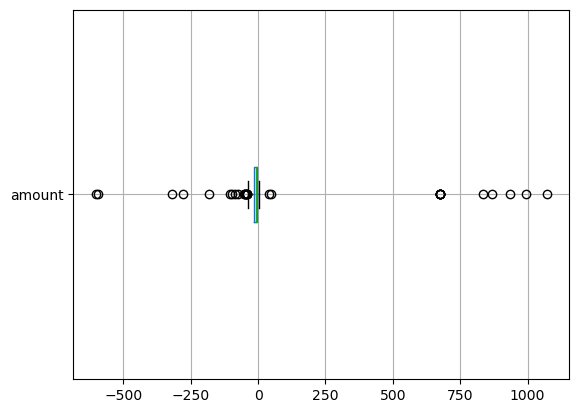

--------------------
TRANSPORT
mean:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: amount, dtype: float64
var:
 2205.016868027212
ect:
 46.95760713694014
skw:
 -1.248265076217821
kur:
 2.1922705326917487


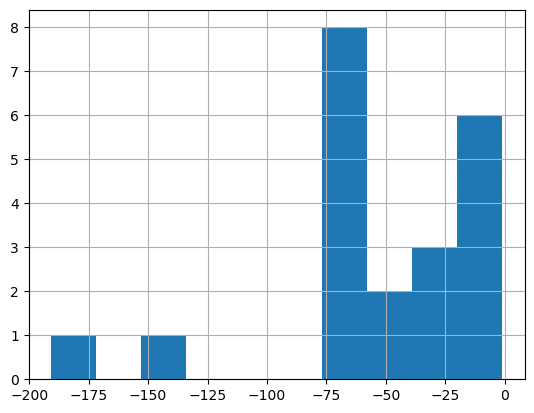

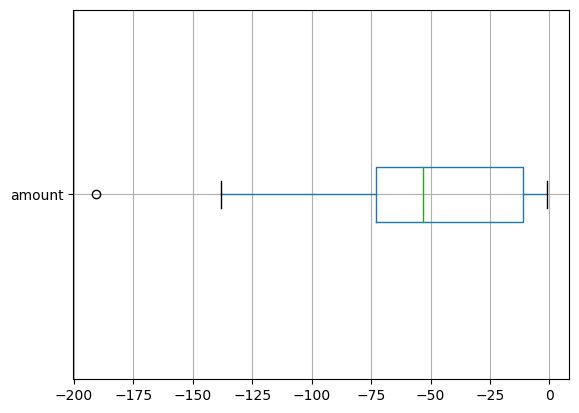

--------------------
TELEPHONE BILL
mean:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: amount, dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317
skw:
 -2.3876514564281526
kur:
 5.798563367885492


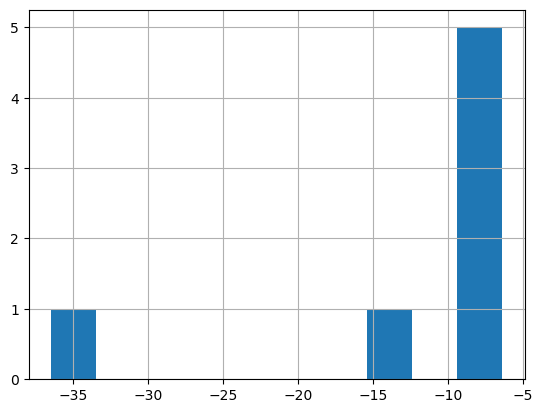

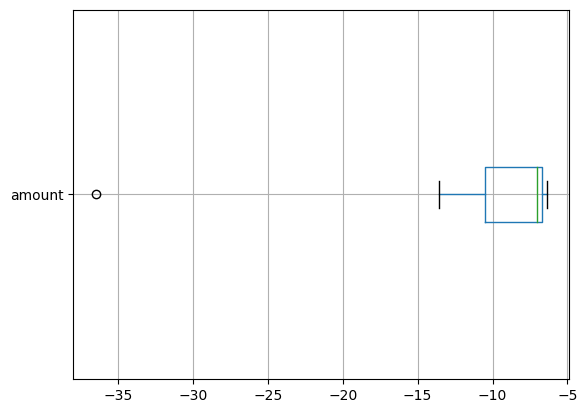

--------------------
GROCERIES
mean:
 -16.341282051282054
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: amount, dtype: float64
var:
 177.0253547666009
ect:
 13.3050875520081
skw:
 -1.246748830645698
kur:
 1.604730494087499


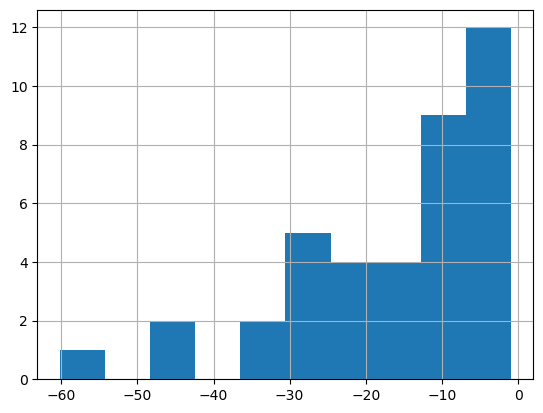

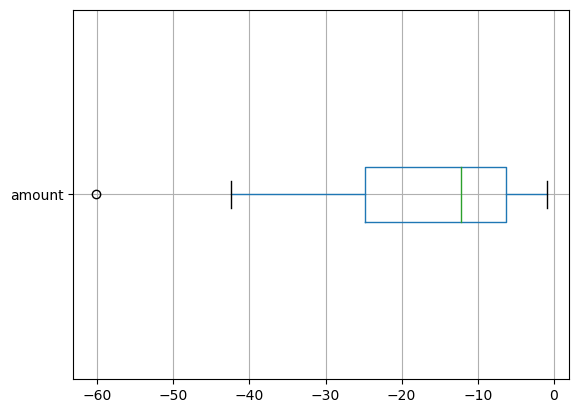

--------------------
BANK FEES
mean:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: amount, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141
skw:
 0.37416573867739106
kur:
 -2.800000000000003


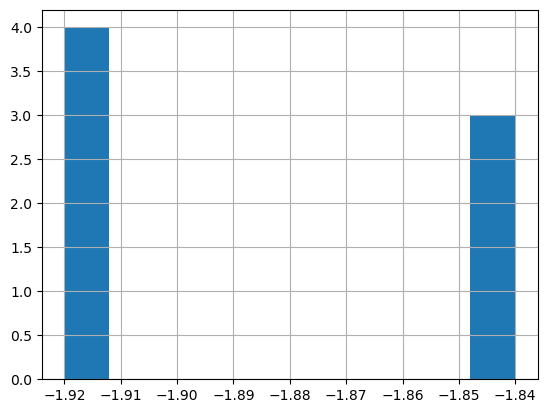

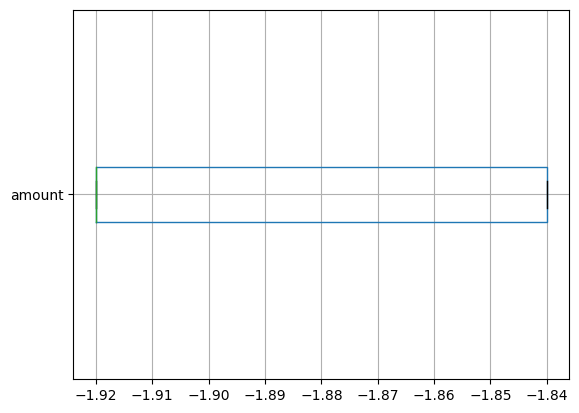

--------------------
RESTAURANT
mean:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: amount, dtype: float64
var:
 2.853193750000001
ect:
 1.689139943876765
skw:
 -0.8883503487158837
kur:
 0.5988855591691937


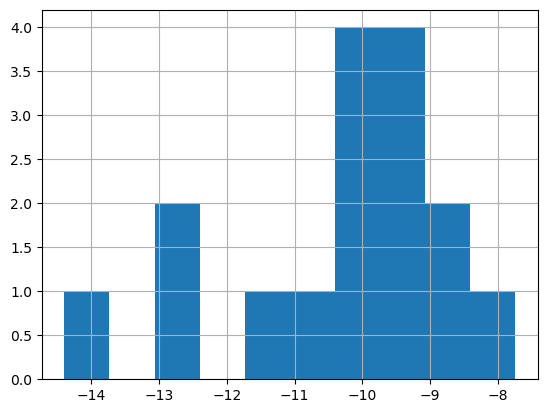

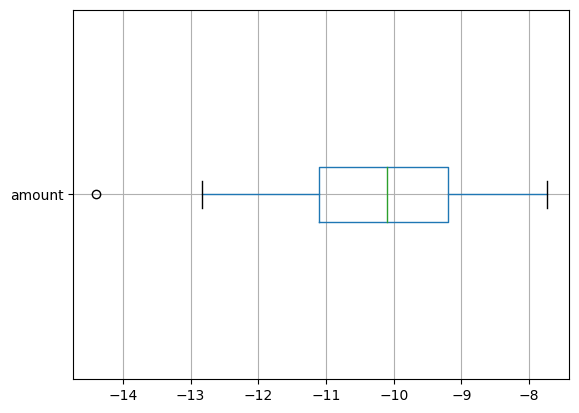

--------------------
RENT
mean:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: amount, dtype: float64
var:
 0.0
ect:
 0.0
skw:
 0
kur:
 0


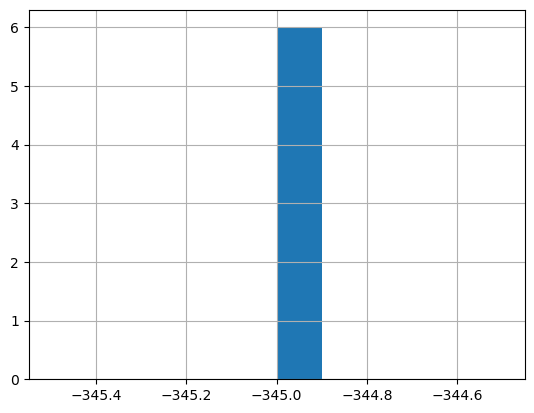

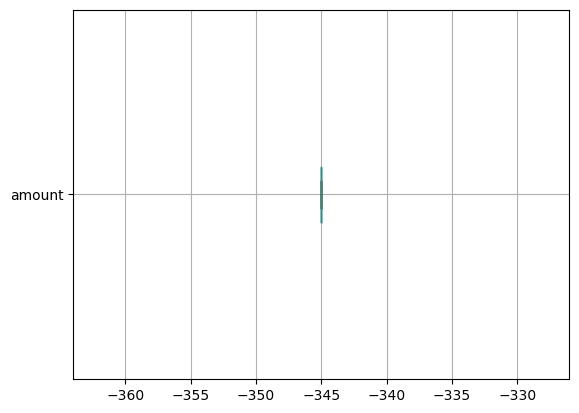

In [6]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Creation of sub-sample
    print("-"*20)
    print(cat)
    print("mean:\n",subset['amount'].mean())
    print("med:\n",subset['amount'].median())
    print("mod:\n",subset['amount'].mode())
    print("var:\n",subset['amount'].var(ddof=0))
    print("ect:\n",subset['amount'].std(ddof=0))
    print("skw:\n",subset['amount'].skew())
    print("kur:\n",subset['amount'].kurtosis())
    subset["amount"].hist() # Creates the histogram
    plt.show()  # Displays the histogram
    subset.boxplot(column="amount", vert=False)
    plt.show()

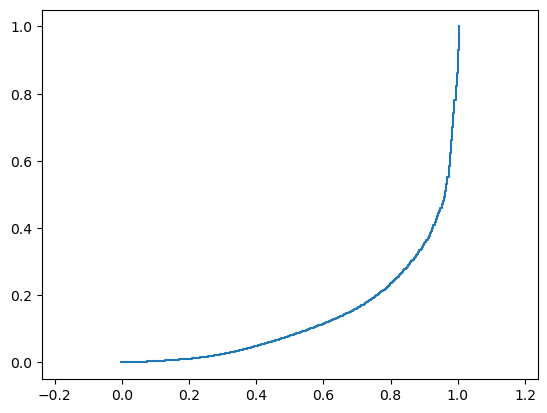

In [7]:
expenses = data[data['amount'] < 0]
exp = -expenses['amount'].values
n = len(exp)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [8]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.7204386813739185